### Import Lib

In [125]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input,Embedding,LSTM
from tensorflow.keras.callbacks import EarlyStopping





import warnings
warnings.filterwarnings("ignore")

In [103]:
seed = 123
np.random.seed(seed)

### Load imdb data & word index

In [104]:
vocab_size = 10000
maxlen = 300
(X_train, y_train), (X_test, y_test) =  imdb.load_data(num_words=vocab_size)

X_train = pad_sequences(X_train, maxlen=maxlen)
X_test =  pad_sequences(X_test, maxlen=maxlen)

print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)

print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (25000, 300)
X_test shape (25000, 300)
y_train shape (25000,)
y_test shape (25000,)


In [105]:
word_index = imdb.get_word_index()
word_index = dict(map(reversed, word_index.items()))

In [106]:
word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

### Exploratory Data Analysis

In [107]:
print("Train - no of negative & postive feedbacks",sum(y_train==1),sum(y_train==0))
print("Test - no of negative & postive feedbacks",sum(y_test==1),sum(y_test==0))

Train - no of negative & postive feedbacks 12500 12500
Test - no of negative & postive feedbacks 12500 12500


In [108]:
print(X_train[0])
print([word_index.get(i) for i in X_train[0]])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    1   14
   22   16   43  530  973 1622 1385   65  458 4468   66 3941    4  173
   36  256    5   25  100   43  838  112   50  670    2    9   35  480
  284    5  150    4  172  112  167    2  336  385   39    4  172 4536
 1111   17  546   38   13  447    4  192   50   16    6  147 2025   19
   14   22    4 1920 4613  469    4   22   71   87   12   16   43  530
   38   76   15   13 1247    4   22   17  515   17   12   16  626   18
    2    5   62  386   12    8  316    8  106    5    4 2223 5244   16
  480   66 3785   33    4  130   12   16   38  619    5   25  124   51
   36 

### Model Building

In [109]:
model = Sequential()
model.add(Embedding(vocab_size, 1000, input_length=X_train.shape[1]))
model.add(LSTM(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [110]:
es = EarlyStopping(monitor='val_loss',patience=5,min_delta=0.001)
fit_history = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test),callbacks=[es])

Epoch 1/100
196/196 [==============================] - 933s 5s/step - loss: 0.5367 - accuracy: 0.7193 - val_loss: 0.3387 - val_accuracy: 0.8602
Epoch 2/100
196/196 [==============================] - 895s 5s/step - loss: 0.2617 - accuracy: 0.8971 - val_loss: 0.3108 - val_accuracy: 0.8769
Epoch 3/100
196/196 [==============================] - 931s 5s/step - loss: 0.1699 - accuracy: 0.9364 - val_loss: 0.3814 - val_accuracy: 0.8654
Epoch 4/100
196/196 [==============================] - 987s 5s/step - loss: 0.1491 - accuracy: 0.9462 - val_loss: 0.4104 - val_accuracy: 0.8648
Epoch 5/100
196/196 [==============================] - 1035s 5s/step - loss: 0.1121 - accuracy: 0.9594 - val_loss: 0.4177 - val_accuracy: 0.8490
Epoch 6/100
196/196 [==============================] - 951s 5s/step - loss: 0.0913 - accuracy: 0.9696 - val_loss: 0.4446 - val_accuracy: 0.8601
Epoch 7/100
196/196 [==============================] - 992s 5s/step - loss: 0.0630 - accuracy: 0.9796 - val_loss: 0.5519 - val_accuracy

### Metrics & prediction

In [113]:
### Metrics
model.evaluate(X_train,y_train)

782/782 [==============================] - 113s 144ms/step - loss: 0.0563 - accuracy: 0.9813


[0.05633359029889107, 0.9812800288200378]

In [116]:
y_predict= model.predict_classes(X_test)

In [121]:
print(classification_report(y_test,y_predict,target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     12500
           1       0.84      0.88      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



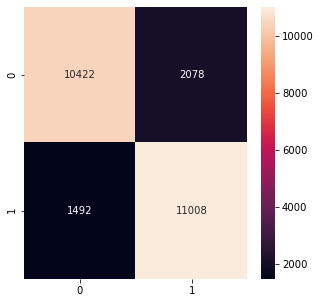

In [130]:
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,fmt='g')